# Description
Probable Name: Neris

MD5: bf08e6b02e00d2bc6dd493e93e69872f

SHA1: 5c2ba68d78471ff02adcdab12b2f82db8efe2104

SHA256: 527da5fd4e501765cdd1bccb2f7c5ac76c0b22dfaf7c24e914df4e1cb8029d71

Password of zip file: infected

Duration: 3 hours, 51 minutes and 0 seconds

VirusTotal

HybridAnalysis

RobotHash

In [23]:
import os

os.chdir(r"/home/yousinator/AuspicesAI/ScytheEx/ai")

import pandas as pd

# Define the path to your file
file_path = "data/capture20110811.pcap.netflow.labeled"

# Load the data
# Since your data appears to be tab-separated, we use sep='\s+' which handles multiple spaces
df = pd.read_csv(
    file_path,
    sep="\s+",
    skiprows=1,
    header=None,
    names=[
        "Date",
        "Flow Start",
        "Durat",
        "Prot",
        "Src_IP_Addr_Port",
        "Dir",
        "Dst_IP_Addr_Port",
        "Flags",
        "Tos",
        "Packets",
        "Bytes",
        "Flows",
        "Label",
    ],
)
df.head()

,Date,Flow Start,Durat,Prot,Src_IP_Addr_Port,Dir,Dst_IP_Addr_Port,Flags,Tos,Packets,Bytes,Flows,Label
0,2011-08-11,10:10:00.003,0.967,UDP,89.31.8.11:23929,->,147.32.84.229:13363,INT,0,2,135,1,Background
1,2011-08-11,10:10:00.003,0.967,UDP,147.32.84.229:13363,->,89.31.8.11:23929,INT,0,2,276,1,Background
2,2011-08-11,10:10:00.006,0.000,UDP,208.88.186.6:34042,->,147.32.84.229:13363,INT,0,1,62,1,Background
3,2011-08-11,10:10:00.008,0.000,UDP,92.118.218.77:55246,->,147.32.84.229:13363,INT,0,1,78,1,Background
4,2011-08-11,10:10:00.009,0.000,UDP,182.185.139.181:10223,->,147.32.84.229:13363,INT,0,1,72,1,Background


## Data Prep

### Dropping Uneeded and Unbalanced Columns

In [24]:
df.drop(["Date", "Dir", "Tos", "Flow Start"], axis=1, inplace=True)

In [25]:
from sklearn.utils import shuffle

def iteratively_balance_dataframe(df):
    # Calculate minimum size from the minority classes
    min_size = min(df["Label"].value_counts())

    # Loop until the sizes of all the unbalanced classes are reduced to close to the minimum size
    while True:
        # Calculate the number of samples in each class
        class_counts = df["Label"].value_counts()
        print("Current class distribution:")
        print(class_counts)

        # Determine if all classes are balanced within a reasonable range
        if all(class_count <= min_size * 1.1 for class_count in class_counts):
            break

        # Reduce each class by approximately 20%
        for label in class_counts.index:
            if class_counts[label] > min_size:
                # Calculate 20% of the current class count above the minimum size
                num_to_reduce = int((class_counts[label] - min_size) * 0.2)
                # Sample the rows to drop
                rows_to_drop = (
                    df[df["Label"] == label]
                    .sample(n=num_to_reduce, random_state=1)
                    .index
                )
                # Drop the rows
                df = df.drop(rows_to_drop)

        # Shuffle the dataset after modification
        
        df = shuffle(df, random_state=1)

    # Return the balanced DataFrame
    return df


# Balance the dataset
df_balanced = iteratively_balance_dataframe(df)

# Reset index for the shuffled dataset
df_balanced.reset_index(drop=True, inplace=True)

Current class distribution:
Label
Background    6071419
LEGITIMATE     225336
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    4868022
LEGITIMATE     191156
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    3905305
LEGITIMATE     163812
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    3135131
LEGITIMATE     141937
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    2518992
LEGITIMATE     124437
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    2026081
LEGITIMATE     110437
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    1631752
LEGITIMATE      99237
Botnet          54433
Name: count, dtype: int64
Current class distribution:
Label
Background    1316289
LEGITIMATE      90277
Botnet          54433
Name: count, dtype

In [26]:
print(df_balanced["Label"].value_counts())

Label
Background    59201
LEGITIMATE    54571
Botnet        54433
Name: count, dtype: int64


In [27]:
df_balanced.head()

,Durat,Prot,Src_IP_Addr_Port,Dst_IP_Addr_Port,Flags,Packets,Bytes,Flows,Label
0,0.281,TCP,147.32.84.229:2596,147.32.80.13:80,FSPA_,5,533,1,LEGITIMATE
1,0.069,TCP,147.32.84.165:1842,193.23.181.44:80,_FSA,2,122,1,Botnet
2,0.125,TCP,147.32.84.165:1040,193.23.181.44:80,FSA_,4,242,1,Botnet
3,3.605,TCP,147.32.84.25:50369,74.125.232.213:80,SPA_,11,6596,1,LEGITIMATE
4,0.000,TCP,147.32.84.165:4192,193.23.181.44:179,S_,1,62,1,Botnet


In [28]:
df_balanced.rename(columns={"Durat": "Duration", "Prot": "Protocol"}, inplace=True)

In [29]:
df_balanced

,Duration,Protocol,Src_IP_Addr_Port,Dst_IP_Addr_Port,Flags,Packets,Bytes,Flows,Label
0,0.281,TCP,147.32.84.229:2596,147.32.80.13:80,FSPA_,5,533,1,LEGITIMATE
1,0.069,TCP,147.32.84.165:1842,193.23.181.44:80,_FSA,2,122,1,Botnet
2,0.125,TCP,147.32.84.165:1040,193.23.181.44:80,FSA_,4,242,1,Botnet
3,3.605,TCP,147.32.84.25:50369,74.125.232.213:80,SPA_,11,6596,1,LEGITIMATE
4,0.000,TCP,147.32.84.165:4192,193.23.181.44:179,S_,1,62,1,Botnet
...,...,...,...,...,...,...,...,...,...
168200,0.000,TCP,147.32.84.165:1616,193.23.181.44:179,S_,1,62,1,Botnet
168201,0.000,TCP,147.32.84.59:40114,74.125.232.194:80,A_,1,66,1,LEGITIMATE
168202,0.215,TCP,147.32.84.165:1465,184.82.147.251:80,FSPA_,5,990,1,Botnet
168203,0.004,TCP,147.32.86.40:2589,147.32.192.127:443,FSPA_,7,1382,1,Background


In [30]:
def split_ip_port(ip_port):
    parts = ip_port.split(":")
    if len(parts) == 2:
        return parts[0], parts[1]  # Return IP and port
    elif len(parts) == 1:
        return parts[0], "Unknown"  # Return IP and assume no port available
    else:
        return "Unknown", "Unknown"  # Return None for both IP and port if unexpected format


# Apply the function to the 'Src_IP_Addr_Port' column
df_balanced["Source IP"], df_balanced["Source Port"] = zip(*df_balanced["Src_IP_Addr_Port"].map(split_ip_port))

# Apply the function to the 'Dst_IP_Addr_Port' column
df_balanced["Destination IP"], df_balanced["Destination Port"] = zip(
    *df_balanced["Dst_IP_Addr_Port"].map(split_ip_port)
)

# Drop the original combined columns if they are no longer needed
df_balanced.drop(["Src_IP_Addr_Port", "Dst_IP_Addr_Port"], axis=1, inplace=True)


In [31]:
df_balanced

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source IP,Source Port,Destination IP,Destination Port
0,0.281,TCP,FSPA_,5,533,1,LEGITIMATE,147.32.84.229,2596,147.32.80.13,80
1,0.069,TCP,_FSA,2,122,1,Botnet,147.32.84.165,1842,193.23.181.44,80
2,0.125,TCP,FSA_,4,242,1,Botnet,147.32.84.165,1040,193.23.181.44,80
3,3.605,TCP,SPA_,11,6596,1,LEGITIMATE,147.32.84.25,50369,74.125.232.213,80
4,0.000,TCP,S_,1,62,1,Botnet,147.32.84.165,4192,193.23.181.44,179
...,...,...,...,...,...,...,...,...,...,...,...
168200,0.000,TCP,S_,1,62,1,Botnet,147.32.84.165,1616,193.23.181.44,179
168201,0.000,TCP,A_,1,66,1,LEGITIMATE,147.32.84.59,40114,74.125.232.194,80
168202,0.215,TCP,FSPA_,5,990,1,Botnet,147.32.84.165,1465,184.82.147.251,80
168203,0.004,TCP,FSPA_,7,1382,1,Background,147.32.86.40,2589,147.32.192.127,443


In [32]:
engineering_df = df_balanced.copy()

In [33]:
engineering_df["Duration"] = engineering_df["Duration"].replace(0.000, 0.001)


engineering_df["Bytes per Packet"] = engineering_df.apply(
    lambda row: row["Bytes"] / row["Packets"] if row["Packets"] > 0 else 0, axis=1
)

# Calculate 'Packets per Second' and 'Bytes per Second' if duration is not zero
engineering_df["Packets per Second"] = engineering_df.apply(
    lambda row: row["Packets"] / row["Duration"] if row["Duration"] > 0 else 0, axis=1
)
engineering_df["Bytes per Second"] = engineering_df.apply(
    lambda row: row["Bytes"] / row["Duration"] if row["Duration"] > 0 else 0, axis=1
)

In [34]:
engineering_df

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source IP,Source Port,Destination IP,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second
0,0.281,TCP,FSPA_,5,533,1,LEGITIMATE,147.32.84.229,2596,147.32.80.13,80,106.600000,17.793594,1896.797153
1,0.069,TCP,_FSA,2,122,1,Botnet,147.32.84.165,1842,193.23.181.44,80,61.000000,28.985507,1768.115942
2,0.125,TCP,FSA_,4,242,1,Botnet,147.32.84.165,1040,193.23.181.44,80,60.500000,32.000000,1936.000000
3,3.605,TCP,SPA_,11,6596,1,LEGITIMATE,147.32.84.25,50369,74.125.232.213,80,599.636364,3.051318,1829.680999
4,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,4192,193.23.181.44,179,62.000000,1000.000000,62000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168200,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,1616,193.23.181.44,179,62.000000,1000.000000,62000.000000
168201,0.001,TCP,A_,1,66,1,LEGITIMATE,147.32.84.59,40114,74.125.232.194,80,66.000000,1000.000000,66000.000000
168202,0.215,TCP,FSPA_,5,990,1,Botnet,147.32.84.165,1465,184.82.147.251,80,198.000000,23.255814,4604.651163
168203,0.004,TCP,FSPA_,7,1382,1,Background,147.32.86.40,2589,147.32.192.127,443,197.428571,1750.000000,345500.000000


In [35]:
def clean_port(port):
    try:
        # Attempt to convert port to integer
        return int(port)
    except ValueError:
        # If conversion fails, return 0
        return 0


# Clean the 'Destination Port' data
engineering_df["Destination Port"] = engineering_df["Destination Port"].apply(
    clean_port
)

engineering_df["Source Port"] = engineering_df["Source Port"].apply(
    clean_port
)

def is_encrypted_protocol(port):
    encrypted_ports = {443, 22, 993, 995, 465, 587, 636, 989, 990, 992, 1194, 500}
    return 1 if port in encrypted_ports else 0


def is_common_port(port):
    common_ports = {80, 443, 21, 22, 25, 110, 143, 3306, 3389, 5900, 53, 23}
    return 1 if port in common_ports else 0

engineering_df["Destination Port"] = engineering_df["Destination Port"].astype(int)
engineering_df["Source Port"] = engineering_df["Source Port"].astype(int)


# Apply the encryption check
engineering_df["Is Encrypted Traffic"] = engineering_df["Destination Port"].apply(
    is_encrypted_protocol
)

# Apply the common port check
engineering_df["Common Port Usage"] = engineering_df["Destination Port"].apply(
    is_common_port
)

In [36]:
engineering_df

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source IP,Source Port,Destination IP,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage
0,0.281,TCP,FSPA_,5,533,1,LEGITIMATE,147.32.84.229,2596,147.32.80.13,80,106.600000,17.793594,1896.797153,0,1
1,0.069,TCP,_FSA,2,122,1,Botnet,147.32.84.165,1842,193.23.181.44,80,61.000000,28.985507,1768.115942,0,1
2,0.125,TCP,FSA_,4,242,1,Botnet,147.32.84.165,1040,193.23.181.44,80,60.500000,32.000000,1936.000000,0,1
3,3.605,TCP,SPA_,11,6596,1,LEGITIMATE,147.32.84.25,50369,74.125.232.213,80,599.636364,3.051318,1829.680999,0,1
4,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,4192,193.23.181.44,179,62.000000,1000.000000,62000.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168200,0.001,TCP,S_,1,62,1,Botnet,147.32.84.165,1616,193.23.181.44,179,62.000000,1000.000000,62000.000000,0,0
168201,0.001,TCP,A_,1,66,1,LEGITIMATE,147.32.84.59,40114,74.125.232.194,80,66.000000,1000.000000,66000.000000,0,1
168202,0.215,TCP,FSPA_,5,990,1,Botnet,147.32.84.165,1465,184.82.147.251,80,198.000000,23.255814,4604.651163,0,1
168203,0.004,TCP,FSPA_,7,1382,1,Background,147.32.86.40,2589,147.32.192.127,443,197.428571,1750.000000,345500.000000,1,1


In [37]:
engineering_df.drop(["Destination IP", "Source IP"], axis=1, inplace = True)

In [38]:
df = engineering_df.copy()

df.to_csv("data/neris.csv",index=False)

# Modeling

## Data Prep

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168205 entries, 0 to 168204
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Duration              168205 non-null  float64
 1   Protocol              168205 non-null  object 
 2   Flags                 168205 non-null  object 
 3   Packets               168205 non-null  int64  
 4   Bytes                 168205 non-null  int64  
 5   Flows                 168205 non-null  int64  
 6   Label                 168205 non-null  object 
 7   Source Port           168205 non-null  int64  
 8   Destination Port      168205 non-null  int64  
 9   Bytes per Packet      168205 non-null  float64
 10  Packets per Second    168205 non-null  float64
 11  Bytes per Second      168205 non-null  float64
 12  Is Encrypted Traffic  168205 non-null  int64  
 13  Common Port Usage     168205 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 18.

In [40]:
from sklearn.preprocessing import LabelEncoder

df["Destination Port"] = df["Destination Port"].apply(
    clean_port
)

encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    df[column] = encoder.fit_transform(df[column])

In [41]:
X = df.drop("Label", axis=1)
y = df["Label"]

## Creating Model

In [42]:
import mlflow

mlflow.set_experiment("Neris XGBoost Params Tuning")

<Experiment: artifact_location='file:///home/yousinator/AuspicesAI/ScytheEx/ai/mlruns/109515869865672155', creation_time=1714643003473, experiment_id='109515869865672155', last_update_time=1714643003473, lifecycle_stage='active', name='Neris XGBoost Params Tuning', tags={}>

In [43]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)
# add girdsearch
max_depth = 30
alpha = 30
learning_rate = 0.4
n_estimators = 300

cols = df.columns
mlflow.start_run()
mlflow.log_param("max_depth", max_depth)
mlflow.log_param("alpha", alpha)
mlflow.log_param("learning_rate", learning_rate)
mlflow.log_param("n_estimators", n_estimators)
mlflow.log_param("feature count", len(cols))

# Setting up the XGBoost classifier for multiclass classification
params = {
    "objective": "multi:softprob",  # Multiclass classification
    "num_class": 9,  # Number of unique classes
    "max_depth": max_depth,  # Maximum depth of a tree
    "alpha": alpha,  # L1 regularization on weights
    "learning_rate": learning_rate,  # Step size shrinkage used to prevent overfitting
    "n_estimators": n_estimators,  # Number of trees to fit
}


# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(**params)

# Training the model
xgb_clf.fit(X_train, y_train)

# Predicting the labels of the test set
y_pred = xgb_clf.predict(X_test)

# Calculating the accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="micro")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1: {accuracy * 100:.2f}%")

mlflow.log_metric("Accuracy", accuracy)
mlflow.log_metric("f1", f1)
mlflow.end_run()

Accuracy: 95.36%
F1: 95.36%


In [44]:
mlflow.end_run()

In [49]:
import pickle

with open("models/Neris_XGBoost_model.pkl", "wb") as file:
    pickle.dump(xgb_clf, file)

In [46]:
df.dtypes

Duration                float64
Protocol                  int64
Flags                     int64
Packets                   int64
Bytes                     int64
Flows                     int64
Label                     int64
Source Port               int64
Destination Port          int64
Bytes per Packet        float64
Packets per Second      float64
Bytes per Second        float64
Is Encrypted Traffic      int64
Common Port Usage         int64
dtype: object

In [47]:
df.columns

Index(['Duration', 'Protocol', 'Flags', 'Packets', 'Bytes', 'Flows', 'Label',
       'Source Port', 'Destination Port', 'Bytes per Packet',
       'Packets per Second', 'Bytes per Second', 'Is Encrypted Traffic',
       'Common Port Usage'],
      dtype='object')

In [50]:
df_balanced["Flags"].value_counts().keys()

Index(['INT', 'S_', 'PA_', 'A_', 'SPA_', 'FSPA_', 'FA_', '_FSPA', 'RA_',
       'FPA_', 'SA_', 'FSA_', 'SRA_', '_FSA', 'FSRPA_', 'SRPA_', 'URP',
       'FSRA_', 'FRA_', 'R_', 'URH', 'FRPA_', '_FSRPA', 'RED', 'RPA_', 'ECO',
       'TXD', 'URN', 'SR_', 'FS_', 'URFIL', 'CON', 'URHPRO', 'ECR', 'NNS',
       'URF', '_FSRA', 'FPAC_', 'SEC_', 'PAC_'],
      dtype='object', name='Flags')

In [51]:
df_balanced["Protocol"].value_counts().keys()

Index(['TCP', 'UDP', 'ICMP', 'RTCP', 'ARP', 'IGMP', 'ESP', 'IPX/SPX', 'PIM',
       'IPV6-ICMP', 'GRE', 'UDT', 'RTP'],
      dtype='object', name='Protocol')

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


array([[16443,   157,  1175],
       [   41, 15797,   354],
       [  367,   245, 15883]])

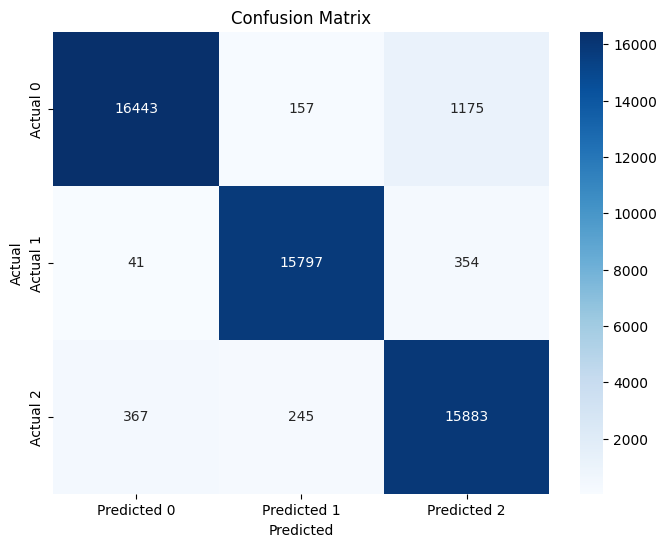

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt="g",
    xticklabels=["Predicted 0", "Predicted 1", "Predicted 2"],
    yticklabels=["Actual 0", "Actual 1", "Actual 2"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [57]:
botnets = engineering_df[engineering_df["Label"] == "Botnet"]

,Duration,Protocol,Flags,Packets,Bytes,Flows,Label,Source Port,Destination Port,Bytes per Packet,Packets per Second,Bytes per Second,Is Encrypted Traffic,Common Port Usage
1,0.069,TCP,_FSA,2,122,1,Botnet,1842,80,61.0,28.985507,1768.115942,0,1
2,0.125,TCP,FSA_,4,242,1,Botnet,1040,80,60.5,32.000000,1936.000000,0,1
4,0.001,TCP,S_,1,62,1,Botnet,4192,179,62.0,1000.000000,62000.000000,0,0
5,0.001,TCP,S_,1,62,1,Botnet,3886,80,62.0,1000.000000,62000.000000,0,1
6,0.001,TCP,S_,1,62,1,Botnet,4312,80,62.0,1000.000000,62000.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168198,2.775,TCP,RA_,3,180,1,Botnet,6667,4726,60.0,1.081081,64.864865,0,0
168199,3.011,TCP,S_,2,124,1,Botnet,2641,80,62.0,0.664231,41.182331,0,1
168200,0.001,TCP,S_,1,62,1,Botnet,1616,179,62.0,1000.000000,62000.000000,0,0
168202,0.215,TCP,FSPA_,5,990,1,Botnet,1465,80,198.0,23.255814,4604.651163,0,1


In [60]:
botnets["Is Encrypted Traffic"].value_counts()

Is Encrypted Traffic
0    52637
1     1796
Name: count, dtype: int64

In [61]:
botnets["Protocol"].value_counts()

KeyError: 'TCP'